# Primjer 2. Analiza kretanja bruto domaćeg proizvoda

### Instaliranje modula koji koristi podatke iz baze WorldBank (Svjetske banke)

In [ ]:
! pip install pandas_datareader

## Kretanje BDP za BiH 1995-2023

/tmp/ipykernel_327697/3872088570.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator=indicator, country=countries, start=1995, end=2023)


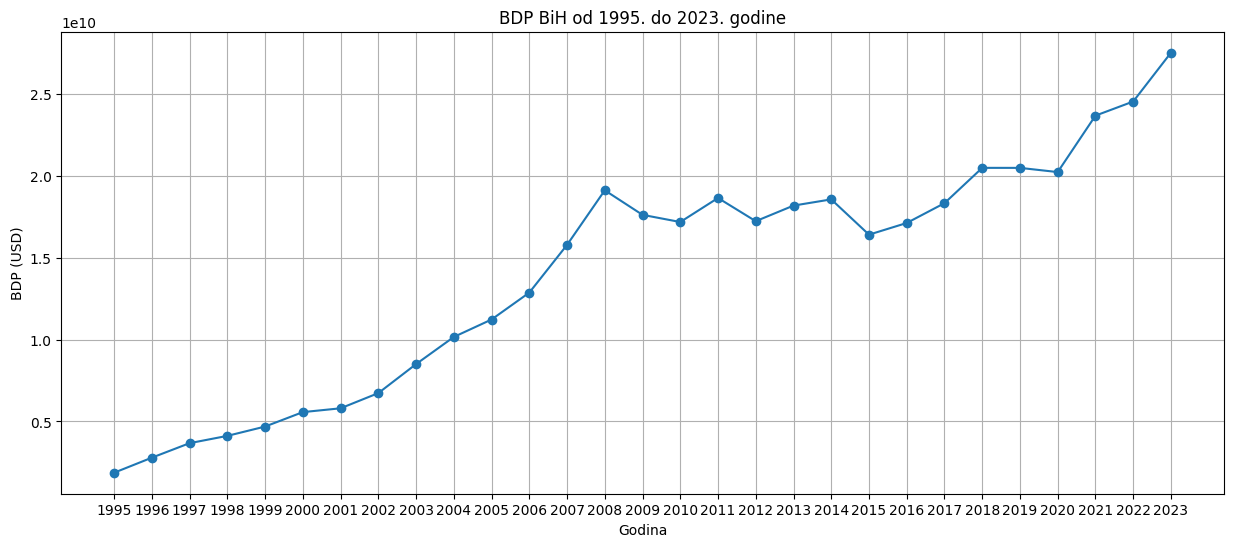

In [7]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt

# Definisanje zemalja i indikatora
countries = ['BA']  # Bosna i Hercegovina
indicator = 'NY.GDP.MKTP.CD'  # BDP (trenutne cijene u USD)

# Preuzimanje podataka sa Svjetske banke
data = wb.download(indicator=indicator, country=countries, start=1995, end=2023)

# Resetovanje indeksa da bismo dobili kolone 'country' i 'year'
data = data.reset_index()

# Sortiranje podataka po godini u rastućem redoslijedu
data = data.sort_values('year')

# Pivotiranje podataka za lakšu vizualizaciju
data_pivot = data.pivot(index='year', columns='country', values=indicator)

# Vizualizacija podataka
plt.figure(figsize=(15,6))
plt.plot(data['year'], data[indicator], marker='o', linestyle='-')
plt.title('BDP BiH od 1995. do 2023. godine')
plt.xlabel('Godina')
plt.ylabel('BDP (USD)')
plt.grid(True)
plt.show()

## Proširena analiza BDP-a - Poređenje sa okruženjem

/tmp/ipykernel_327697/2702953946.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator=indicator, country=countries, start=2000, end=2021)


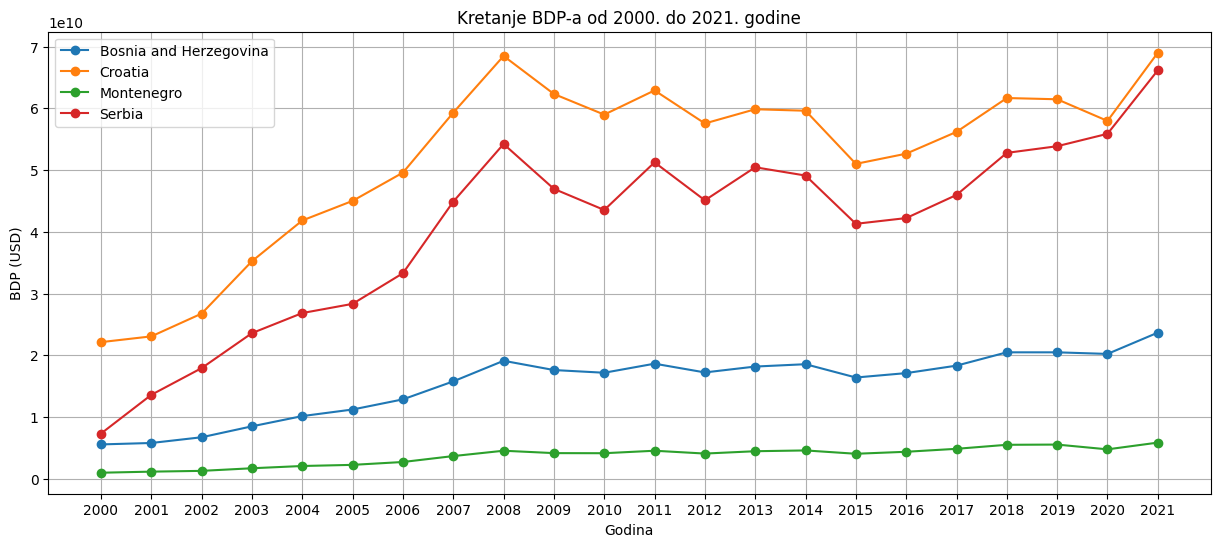

In [8]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt

# Definisanje zemalja i indikatora
countries = ['BA', 'HR', 'RS', 'ME']  # ISO kodovi za zemlje
indicator = 'NY.GDP.MKTP.CD'  # BDP (trenutne cijene u USD)

# Preuzimanje podataka sa Svjetske banke
data = wb.download(indicator=indicator, country=countries, start=2000, end=2021)

# Resetovanje indeksa da bismo dobili kolone 'country' i 'year'
data = data.reset_index()

# Sortiranje podataka po godini u rastućem redoslijedu
data = data.sort_values('year')

# Pivotiranje podataka za lakšu vizualizaciju
data_pivot = data.pivot(index='year', columns='country', values=indicator)

# Vizualizacija podataka
plt.figure(figsize=(15, 6))
for country in data_pivot.columns:
    plt.plot(data_pivot.index, data_pivot[country], marker='o', linestyle='-', label=country)

plt.title('Kretanje BDP-a od 2000. do 2021. godine')
plt.xlabel('Godina')
plt.ylabel('BDP (USD)')
plt.legend()
plt.grid(True)
plt.show()